# Project: Wrangle and Analyze Data

## What is Data Wrangling?
Data Wrangling is a process where first data is gathered from different sources,then the quality of the data is assessed and finally the data is cleaned to create a dataset on which exploratory data analysis could be performed.

# Introduction

### In this project, we will gather data from multiple sources and multiple formats, after you we will clean it and then collect it, to be analyzed in the end to answer these questions:
1- What is the The relationship between favorite and retweet?

2-What is the most used source?

3- What is The top dog stage in retweets?


## 1- Data Gathering

In [2]:
#load liberarys That will need

import pandas as pd
import numpy as np
import requests 
import re
import os 
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
#read twitter_archive.CSV file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#download and save images data

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [5]:
#load files 
arch_df = pd.read_csv('twitter-archive-enhanced.csv')
imag_df = pd.read_csv('image-predictions.tsv' , sep = '\t')
tweet_df = pd.read_json('tweet-json copy' , lines = True)
imag_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)


In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
138,865718153858494464,NaN,NaN,2017-05-19 23:57:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Boomer. He's just checking pup on you. Ho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/865718153...,13,10,Boomer,None,None,None,None
1086,738166403467907072,NaN,NaN,2016-06-02 00:32:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Axel. He's a professional leaf catcher...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738166403...,12,10,Axel,None,None,None,None
1183,718939241951195136,NaN,NaN,2016-04-09 23:10:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Otis. Everybody look at Otis. 12/10 wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718939241...,12,10,Otis,None,None,None,None
631,794205286408003585,NaN,NaN,2016-11-03 15:51:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Laika. She was a space pupper. The fir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/794205286...,14,10,Laika,None,None,pupper,None
1559,688547210804498433,NaN,NaN,2016-01-17 02:23:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frönq. He got caught stealing a waffle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688547210...,9,10,Frönq,None,None,None,None


In [9]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


# 2- Assessing Data

#### Assessing is the second step in the data wrangling process:After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issuesAssessing : this requrement in this project Identify eight (8) quality issues and two (2) tidiness issuesYou can assess data for: Quality: issues with content. Low quality data is also known as dirty data. Tidiness: issues with structure that prevent easy analysis. Untidy data is also known as messy data.

### 2-1 Assessing Data | twitter_archive Dataset

In [10]:
#show the first 2 row
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [11]:
#show the file information
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
#check if there is duplicated
twitter_archive.duplicated().sum()

0

In [13]:
#check if there is null
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### 2-2 Assessing Data | Imag_df

### Quality:
#### 1-Null values recorded as None and NaN(missing values)
#### 2- tweet_id type is int64 ,I will chanage tweet_id data type to string
#### 3-convert timestamp to be datetime and rename the column into tweet_date 
#### 4-We have some columns that contain unnecessary data we have to deleted


In [14]:
#show the first 2 row
imag_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [15]:
#show the file information
imag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
imag_df.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1875,845677943972139009,https://pbs.twimg.com/media/C7xzmngWkAAAp9C.jpg,1,chow,0.808681,True,groenendael,0.123141,True,Newfoundland,0.022143,True
1993,874012996292530176,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,2,Cardigan,0.806674,True,Pembroke,0.116622,True,kelpie,0.049182,True
1836,837110210464448512,https://pbs.twimg.com/media/C54DS1kXQAEU5pS.jpg,1,Siberian_husky,0.767696,True,Eskimo_dog,0.217079,True,malamute,0.011657,True
88,667530908589760512,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,1,golden_retriever,0.633037,True,kuvasz,0.146391,True,Labrador_retriever,0.046184,True


In [17]:
imag_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
#check if there is duplicated
imag_df.duplicated().sum()

0

In [19]:
#check if there is null
imag_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [20]:
imag_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [21]:
imag_df.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [22]:
imag_df.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### 2-3 Assessing Data | tweet_df

In [23]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [24]:
tweet_df.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [25]:
tweet_df.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [26]:
tweet_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Quality: 1-Missing values in some cloumns 2-id column should named 'tweet_id' as the others data have ,and dtype should be string , sourse change data type to category 3-We have some columns that contain unnecessary data such as in_reply_to_user_id_str ... just need id,retweet_count,favorite_count 4-source mixed html tag ,Rewrite the tweet source, from iphone ,web...etc

## 3- Cleaning Data¶

## 3-1 Cleaning Data | twitter_archive 

In [27]:
#Create a copy of twitter_archive dataframe
twitter_archive_copy = twitter_archive.copy()
twitter_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 1-1 Defin
First we will drop unnecessary columns

### 1-1 Code


In [28]:
drop_columns = ['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator']
twitter_archive_copy.drop(drop_columns, axis=1,inplace = True)

### 1-1 Test

In [29]:
twitter_archive_copy.head(3)

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None


### 1-2 Defin
Extract similar columns to a new column

### 1-2 Code

In [30]:
twitter_archive_copy

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,a,None,None,None,None


### Tidiness Isuue

### 1-3 Defin
#### The 4 different columns doggo, floofer, pupper and puppo, combine in one columns represent stages_of_dogs" doggo|floofer|pupper|puppo

### 1-3 Code

In [31]:
# Extract doggo, floofer, pupper and puppo columns into new 'stages_of_dogs' column 
twitter_archive_copy['stages_of_dogs'] = twitter_archive_copy.doggo +\
                              twitter_archive_copy.floofer +\
                              twitter_archive_copy.pupper +\
                              twitter_archive_copy.puppo

In [32]:
twitter_archive_copy.stages_of_dogs.value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stages_of_dogs, dtype: int64

In [33]:
twitter_archive_copy['stages_of_dogs'] = [i.replace('None' , '') for i in twitter_archive_copy['stages_of_dogs']]

### 1-3 Test

In [34]:
twitter_archive_copy.stages_of_dogs.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: stages_of_dogs, dtype: int64

In [35]:
twitter_archive_copy.loc[twitter_archive_copy['stages_of_dogs'] == "" , 'stages_of_dogs'] = 'None'
twitter_archive_copy.loc[twitter_archive_copy['stages_of_dogs'] == "doggopupper" , 'stages_of_dogs'] = 'doggo, pupper'
twitter_archive_copy.loc[twitter_archive_copy['stages_of_dogs'] == "doggofloofer" , 'stages_of_dogs'] = 'doggo, floofer'
twitter_archive_copy.loc[twitter_archive_copy['stages_of_dogs'] == "doggopuppo" , 'stages_of_dogs'] = 'doggo, puppo'

In [36]:
## Warining: the code is correct but it raise a warning

In [37]:
twitter_archive_copy.stages_of_dogs.value_counts()

None              1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: stages_of_dogs, dtype: int64

In [38]:
#Drop doggo , floofer , pupper, puppo
drop_columns = ['doggo','floofer','pupper','puppo']
twitter_archive_copy.drop(drop_columns, axis=1,inplace = True)

### 1-2 Test

In [39]:
twitter_archive_copy.head(4)

,tweet_id,timestamp,text,name,stages_of_dogs
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,Darla,None


In [40]:
twitter_archive_copy['stages_of_dogs'].value_counts()

None              1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: stages_of_dogs, dtype: int64

### Quality Issues: 

### 1-3 Defin
Incorrected datatypes on tweet-id and timestamp tweet_id, timestamp

### 1-3 Code

In [41]:
#tweet_id type is int64 ,i will chanage tweet_id data type to string
twitter_archive_copy['tweet_id'] = twitter_archive_copy['tweet_id'].astype(str)

In [42]:
# #convert timestamp data type to datetime and rename the column into tweet_date
twitter_archive_copy.timestamp = pd.to_datetime(twitter_archive_copy['timestamp'])
twitter_archive_copy.rename(columns={"timestamp":'tweet_date'},inplace=True)

### 1-3 Test 

In [43]:
print (twitter_archive_copy['tweet_id'].dtypes)
print (twitter_archive_copy['tweet_date'].dtypes)

object
datetime64[ns, UTC]


In [44]:
#Test are there duplicates in a column tweet_id
twitter_archive_copy.tweet_id.duplicated().sum()

0

### Quality Issue

In [81]:
twitter_archive_copy[twitter_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text']]

C:\Users\96654\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text
45,This is Bella. She hopes her smile made you sm...
340,"RT @dog_rates: This is Logan, the Chow who liv..."
695,"This is Logan, the Chow who lived. He solemnly..."
763,This is Sophie. She's a Jubilant Bush Pupper. ...
1689,I've been told there's a slight possibility he...
1712,Here we have uncovered an entire battalion of ...


### Quality: 
#### 1-tweet_idf should be string type 
#### 2-The types of dogs in columns p1, p2, and p3 had some uppercase \ lowercase letters.


### Tidiness:
#### extract breed of dog from columns p, p_conf and p_dog

# Step2: Cleaning Data | image_predictions dataset :


### 2-1 Defin
#### The types of dogs in columns p1, p2, and p3 had some uppercase \ lowercase letters, change lowercase

### 2-1 Code

In [82]:
imag_df_copy = imag_df.copy()
imag_df_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [83]:
# We need to standardize the case of the letters in the columns p1, p2, p3
imag_df_copy['p1'] = imag_df_copy['p1'].str.lower()
imag_df_copy['p2'] = imag_df_copy['p2'].str.lower()
imag_df_copy['p3'] = imag_df_copy['p3'].str.lower()

### 2-1 Test

In [84]:
imag_df_copy['p1'].head(7)

0    welsh_springer_spaniel
1                   redbone
2           german_shepherd
3       rhodesian_ridgeback
4        miniature_pinscher
5      bernese_mountain_dog
6                box_turtle
Name: p1, dtype: object

In [85]:
imag_df_copy['p2'].head(7)

0                collie
1    miniature_pinscher
2              malinois
3               redbone
4            rottweiler
5      english_springer
6            mud_turtle
Name: p2, dtype: object

In [86]:
imag_df_copy['p3'].head(7)

0             shetland_sheepdog
1           rhodesian_ridgeback
2                    bloodhound
3            miniature_pinscher
4                      doberman
5    greater_swiss_mountain_dog
6                      terrapin
Name: p3, dtype: object

In [87]:
imag_df_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [88]:
imag_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [89]:
#Test are there duplicates in a column tweet_id
imag_df_copy.tweet_id.duplicated().sum()

0

### Quality Issues:

### 2-2 Defin
#### tweet_idf should be string type

### 2-2 Code

In [90]:
# tweet_id type is int64 ,i will chanage tweet_id data type to string
imag_df_copy['tweet_id'] = imag_df_copy['tweet_id'].astype('str')

### 2-2 Test 

In [91]:
print(imag_df_copy['tweet_id'].dtype)

object


## Step3: Cleaning Data | data_tweet dataset

In [92]:
#Create a copy of data_tweet dataframe 
tweet_df_copy = tweet_df.copy()
tweet_df_copy.head(5)


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [93]:
tweet_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Quality Issues:

### 3-1 Defin
we need to rename id_str to tweet_id as the others dataset

### 3-1 Code

In [94]:
# we need to rename id_str to tweet_id as the others dataset
tweet_df_copy.rename(columns={'id_str':'tweet_id'},inplace=True)

### 3-1 Test 

In [95]:
tweet_df_copy.head(1)

,created_at,id,tweet_id,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [96]:
tweet_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   tweet_id                       2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### 3-2 Defin

#### we need to change tweet_id from int to string and change data type to category

### 3-2 Code

In [97]:
tweet_df_copy['tweet_id'] = tweet_df_copy['tweet_id'].astype('str')
tweet_df_copy['source'] = tweet_df_copy['source'].astype('category')

### 3-2 Test

In [98]:
print(tweet_df_copy['tweet_id'].dtype)
print(tweet_df_copy['source'].dtype)

object
category


In [99]:
#Test are there duplicates in a column tweet_id
tweet_df_copy.tweet_id.duplicated().sum()

0

### Quailty Issue
We delete the columns that we do not need

### 3-4 Defin
#### We delete the columns that we do not need

### 3-4 Code

In [100]:
tweet_df_copy.drop(columns=['created_at','display_text_range','truncated','full_text','entities'
    ,'extended_entities','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str'
     ,'in_reply_to_screen_name','user','geo','coordinates','favorited','retweeted','possibly_sensitive','possibly_sensitive_appealable','lang'
    ,'retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status','place','contributors','is_quote_status'],inplace=True)

### 3-4 Test

In [101]:
tweet_df_copy.head(1)

,id,tweet_id,source,retweet_count,favorite_count
0,892420643555336193,892420643555336192,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467


In [102]:

tweet_df_copy.isnull().sum()

id                0
tweet_id          0
source            0
retweet_count     0
favorite_count    0
dtype: int64

### Quailty Issue
Merge all dataset

## Greating data frame and merge all dataset

In [103]:
# Merge twitter_archive_copy ,tweet_df_copy and imag_df to merge_df dataframe
merge_df = pd.merge(twitter_archive_copy , imag_df_copy , on='tweet_id' , how ='left')
merge_df.head(2)

,tweet_id,tweet_date,text,name,stages_of_dogs,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True


In [104]:
merge_df = pd.merge(twitter_archive_copy , tweet_df_copy , on='tweet_id' , how ='left')
merge_df.head(2)

,tweet_id,tweet_date,text,name,stages_of_dogs,id,source,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,None,NaN,NaN,NaN,NaN


In [105]:
#Create a copy for merge_df
merge_df = merge_df.copy()

In [106]:
#Test are there duplicates in a column tweet_id
merge_df.tweet_id.duplicated().sum()

0

In [107]:
merge_df.head(3)

,tweet_id,tweet_date,text,name,stages_of_dogs,id,source,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,None,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,8.918152e+17,"<a href=""http://twitter.com/download/iphone"" r...",4328.0,25461.0


In [108]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2356 non-null   object             
 1   tweet_date      2356 non-null   datetime64[ns, UTC]
 2   text            2356 non-null   object             
 3   name            2356 non-null   object             
 4   stages_of_dogs  2356 non-null   object             
 5   id              1518 non-null   float64            
 6   source          1518 non-null   category           
 7   retweet_count   1518 non-null   float64            
 8   favorite_count  1518 non-null   float64            
dtypes: category(1), datetime64[ns, UTC](1), float64(3), object(4)
memory usage: 168.2+ KB


# Storing data

In [109]:
merge_df.to_csv('twitter_archive_master_.csv',index=False)

# Analyzing and Visualizing Data

In [110]:
# The relationship between  (favorite_count) and (retweet_count)

In [111]:
analyze_df = pd.read_csv('twitter_archive_master.csv')

Text(0.5, 1.0, 'Relationship : Retweets AND Favorite')

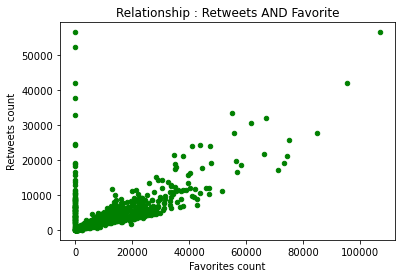

In [112]:
analyze_df.plot(kind='scatter',x='favorite_count',y='retweet_count',color='green')
plt.xlabel('Favorites count')
plt.ylabel('Retweets count')
plt.title('Relationship : Retweets AND Favorite')

<AxesSubplot:title={'center':'Sources of Tweet'}, xlabel='source', ylabel='count'>

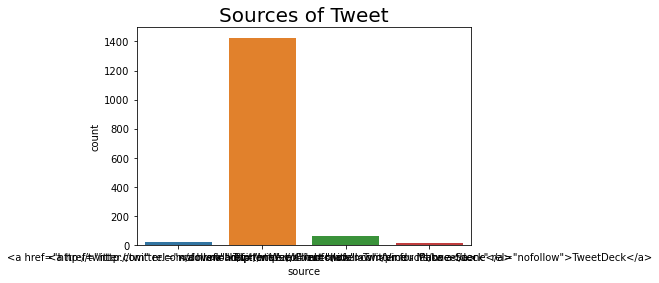

In [113]:
plt.title('Sources of Tweet', size=20)
sns.countplot(data=merge_df, x='source')

In [114]:
# The top dog stage in retweets .

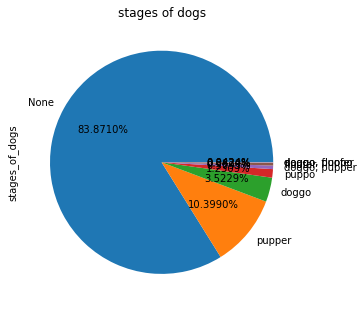

In [79]:
merge_df.stages_of_dogs.value_counts().plot.pie(figsize=(5,6), autopct='%.4f%%')
plt.title('stages of dogs')
plt.show()